## Apply Linear Module and optimizer from Pytorch to achieve linear regression
#### 04/08/2020

In [1]:
import torch
from torch import nn,optim
import matplotlib.pyplot as plt

### Define one module for linear regression

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc = nn.Linear(1,1)
        
    def forward(self,x):
        y_pred = self.fc(x)
        return y_pred
    
net = Net()

### Applying MSELoss and Adam optimizer with learning rate being 0.01

In [3]:
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(),lr=0.01)

### Input dataset has to be tensor
### And it has to be matrix but not a vector

In [4]:
x = torch.tensor([[1.0],[2.0],[3.0]])
x.t()
y = torch.tensor([[3.0],[2.0],[1.0]])
y.t()

loss_list = []
print(x)

tensor([[1.],
        [2.],
        [3.]])


## Something to be aware of:
- For a module, there are two modes: training mode as well as evaluation mode
so when training, use net.train() to note that its training; and net.eval() to note its evaluation
- Before backward, make sure that the optimizer has zero_grad()ed
unless some special requirement exist

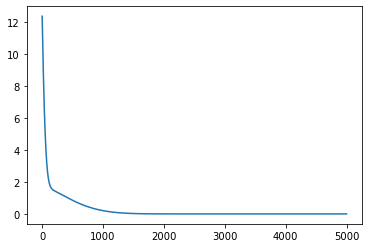

In [5]:
running_loss = 0

for e in range(5000):
    net.train()
    
    optimizer.zero_grad()
    y_pred = net(x)
    loss = criterion(y_pred,y)
    
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    
plt.plot(loss_list)

In [6]:
net.eval()
x_test = torch.tensor([[2.0],[4.0],[6.0]])
x_test.t()
print(net(x_test))

tensor([[ 2.0000e+00],
        [ 4.2915e-06],
        [-2.0000e+00]], grad_fn=<AddmmBackward>)
